In [108]:
############################################################################################################################
#                                                  Torben Falleth Olsen
#                                           Rapidly exploring Random Trees (RRT)
############################################################################################################################

import numpy as np
from numpy.linalg import inv
from numpy.linalg import norm
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [20,10]

#####################################
#        Tuning parameters
#####################################

Delta_q = 50

vehicle_rad = 3.0

###### Region #####
x_span_min = 0.0 
x_span_max = 1000.0

y_span_min = 0.0
y_span_max = 1000.0

###### Goal #######
goal_bias = 0.05
goal = [550.0, 100.0]

###### Position ######
#Position = [250.0,100.0]

###### Obstacle ######
obstacle = [[400.0,1000],[400.0,900],[400.0,800],[400.0,700.0],[400.0,400.0],[400.0,300.0],[400.0,200.0],[400.0,100.0],[400.0,0.0]]
obs_rad = [125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0]







In [109]:
#####################################
#        Sample Random Point
#####################################
def random_sample():
    ran_vec = []
    q_rand = []
    n = np.random.rand(1,1)
    if (n < goal_bias):
        
       ran_vec.append(goal[0])
       ran_vec.append(goal[1])
    
    else:
        rand = np.random.rand(1,2)
        for i in range(0,2):
            ran_vec.append((goal[i]/abs(goal[i]))*(span[i][1] - span[i][0])*rand[0][i])

    rand_p.append([ran_vec[0],ran_vec[1]])
    q_rand.append(ran_vec[0])
    q_rand.append(ran_vec[1])
    
    return q_rand


In [110]:
#####################################
#      Calculate The Nearest Node
#####################################
def Calc_nearest_node(rand,tree):
    nearest = np.inf
    q_near = []
    for ind in range(0,len(tree)):
        x = rand[0]-tree[ind][0]
        y = rand[1]-tree[ind][1]
        vec = [x,y]
        dist = norm(vec)
        
        if dist < nearest:
              q_near = tree[ind]
              index = ind
              nearest = dist
    return q_near,nearest,index


In [111]:
#####################################
#        Calculate The New Node
#####################################
def Calc_new_node(q_n,q_r,near):
    q_new = []
    x = q_r[0] - q_n[0]
    y = q_r[1] - q_n[1]
    x1 = x*(Delta_q/near)
    y1 = y*(Delta_q/near)
    vec0 = [x1,y1]
    vec = [x,y]
    
    
    if Delta_q <= near:
        
        q_new = [q_n[0] + vec0[0],q_n[1] + vec0[1]]
    else:
        q_new = [q_n[0] + vec[0],q_n[1] + vec[1]]
    return q_new



In [112]:
#####################################
#        Collision Avoidance
#####################################

def Collision(point1,point2,ob,ob_rad,v_rad):
    
    collision = False

    for i in range(0,len(ob)):
        
        AB = np.subtract(point2,point1)
        
        
        BP = np.subtract(ob[i],point2)
        
        
        AP = np.subtract(ob[i],point1)
        
        # Case 1
        if (np.dot(AB,BP) > 0):
            
            distance_obs = norm(BP)
            
        # Case 2
        elif (np.dot(AB,AP) < 0):
            
            distance_obs = norm(AP)
        
        # Case 3
        else:
            distance_obs = norm(np.cross(AB,AP)) / norm(AB)
            
                                
        if ((ob_rad[i]+v_rad) > distance_obs):
            
            collision = True
            break
        else:
                                
            collision = False
    

    return collision




In [113]:
#####################################
#        Add New Node To Tree
#####################################
def add_node_to_tree(q_new,parent_index,coll):
    if (coll == False):
        RRT_tree.append(q_new)
        Parent.append(parent_index)


In [114]:
#####################################
#              Main
#####################################

def main(Position):
    
    #####################################
    #        Initialize Tree
    #####################################
    root_parent = -1
    RRT_tree = [Position]
    Path = [goal]
    Parent = [root_parent]
    rand_p = []
    q_new = []
    span = [[x_span_min,x_span_max], [y_span_min,y_span_max]]

    for k in range(1, 200):

       q_rand = random_sample()

       q_near,near,parent_index = Calc_nearest_node(q_rand,RRT_tree)

       q_new = Calc_new_node(q_near,q_rand,near)

       collision = Collision(q_near,q_new,obstacle,obs_rad,vehicle_rad)


    #####################################
    #        Connect New Node To Tree
    #####################################
    
       if (collision == False):
           RRT_tree.append(q_new)
           Parent.append(parent_index)
           
    #####################################
    #        Break condition
    #####################################
       if q_new == goal:
            break
            
    #####################################
    #           Create Path
    #####################################
    index = Parent[len(Parent)-1];

    while (Parent[index]>=0):
        ParentNode = RRT_tree[index]
        Path.append(ParentNode)
        index = Parent[index]
    ParentNode = RRT_tree[index]
    Path.append(ParentNode)

    #####################################
    #              Plot
    #####################################

    #plt.plot(t, yaw_hat, label="yaw_hat")
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, 1001, 100)
    minor_ticks = np.arange(0, 1001, 10)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    ######### Set Plot Limit ###########
    plt.xlim([x_span_min, x_span_max])
    plt.ylim([y_span_min, y_span_max])

    ######### Plot Goal ###########
    plt.plot(goal[0], goal[1],marker="o", markersize=15,markeredgecolor="green",markerfacecolor="green",label="Goal")

    ######### Plot Position ###########
    plt.plot(Position[0], Position[1],marker="o", markersize=15,markeredgecolor="red",markerfacecolor="red",label="Position")

    ######### Plot Random Samples ###########
    for i in range(0,len(rand_p)):
        plt.plot(rand_p[i][0],rand_p[i][1],marker="o", markersize=5,markeredgecolor="lightblue",markerfacecolor="lightblue")

    plt.plot(RRT_tree[0][0],RRT_tree[0][1],marker="o", markersize=7,markeredgecolor="blue",markerfacecolor="blue",label="Tree Node")

    ######### Plot Tree ###########
    for i in range(1,len(RRT_tree)):
        #print(Parent[i]) 
        #plt.plot(RRT_tree[i][0],RRT_tree[i][1],marker="o", markersize=7,markeredgecolor="blue",markerfacecolor="blue")
        plt.plot([RRT_tree[i][0],RRT_tree[Parent[i]][0]],[RRT_tree[i][1],RRT_tree[Parent[i]][1]],'bo', linestyle="--")

    ######### Plot Path ###########
    for i in range(0,len(Path)-1):
        plt.plot([Path[i][0],Path[i+1][0]],[Path[i][1],Path[i+1][1]],'ro',linewidth=2.0,linestyle="-")

    ######### Plot Obstacle ###########

    for i in range(0,len(obstacle)):
        plt.plot(obstacle[i][0],obstacle[i][1],marker="o", markersize=60,markeredgecolor="orange",markerfacecolor="orange")

    plt.legend()
    plt.show()

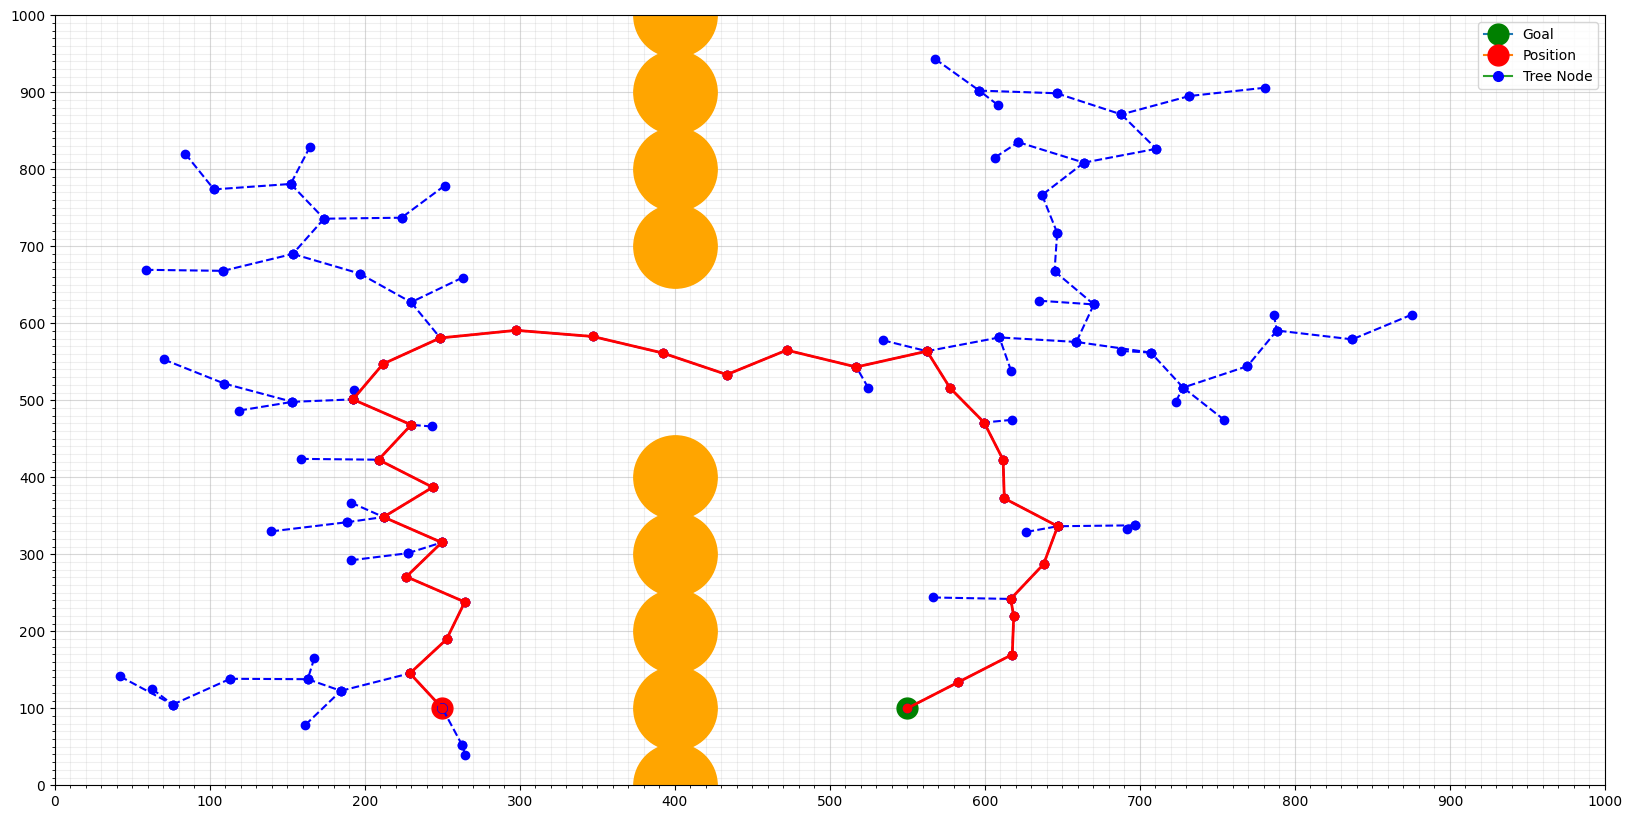

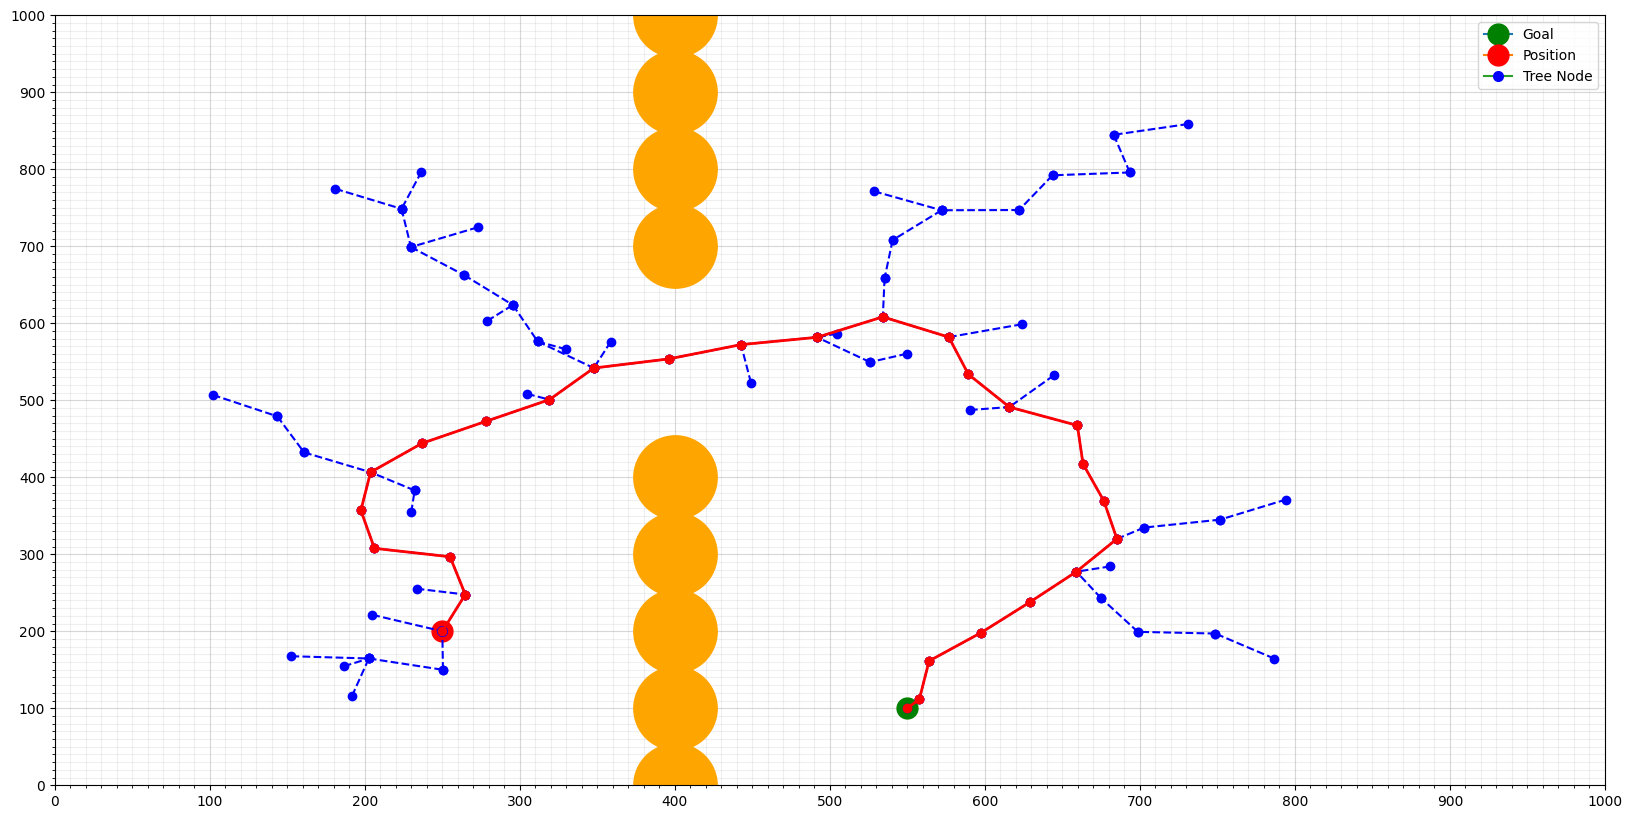

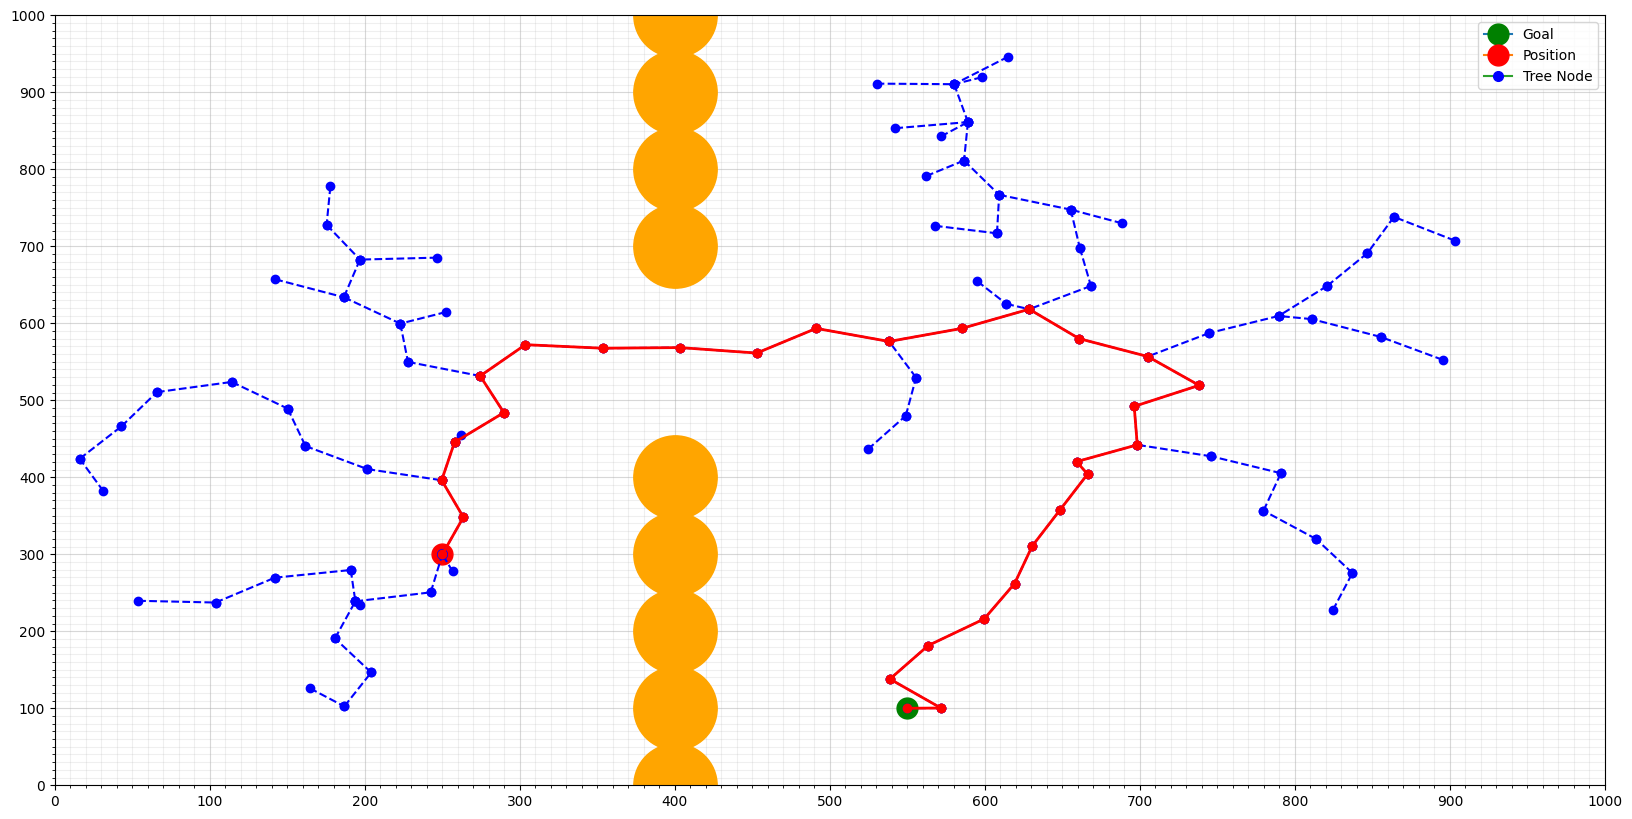

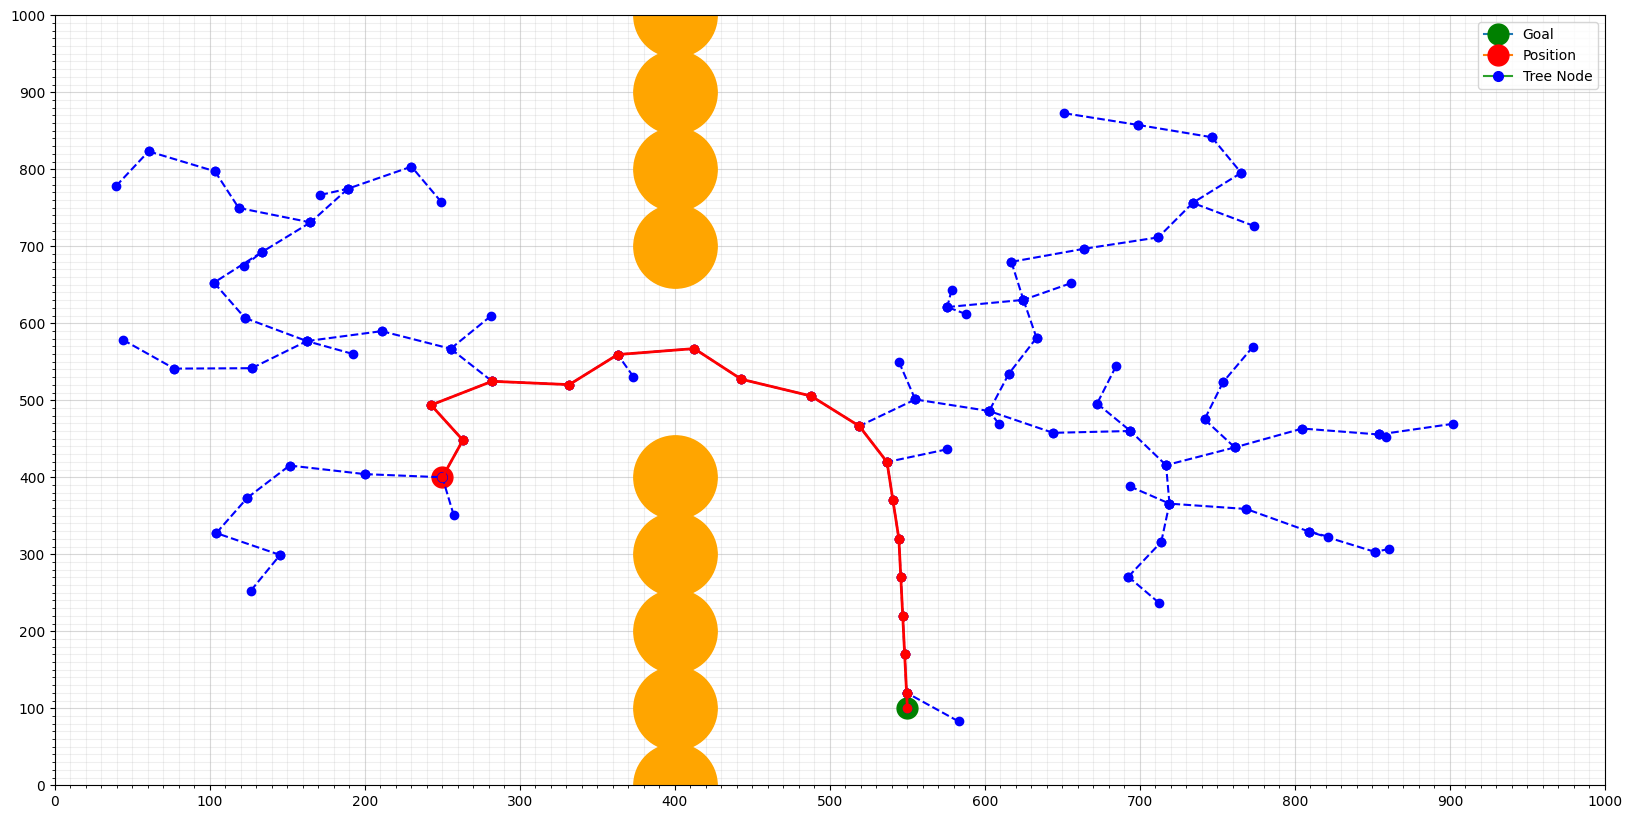

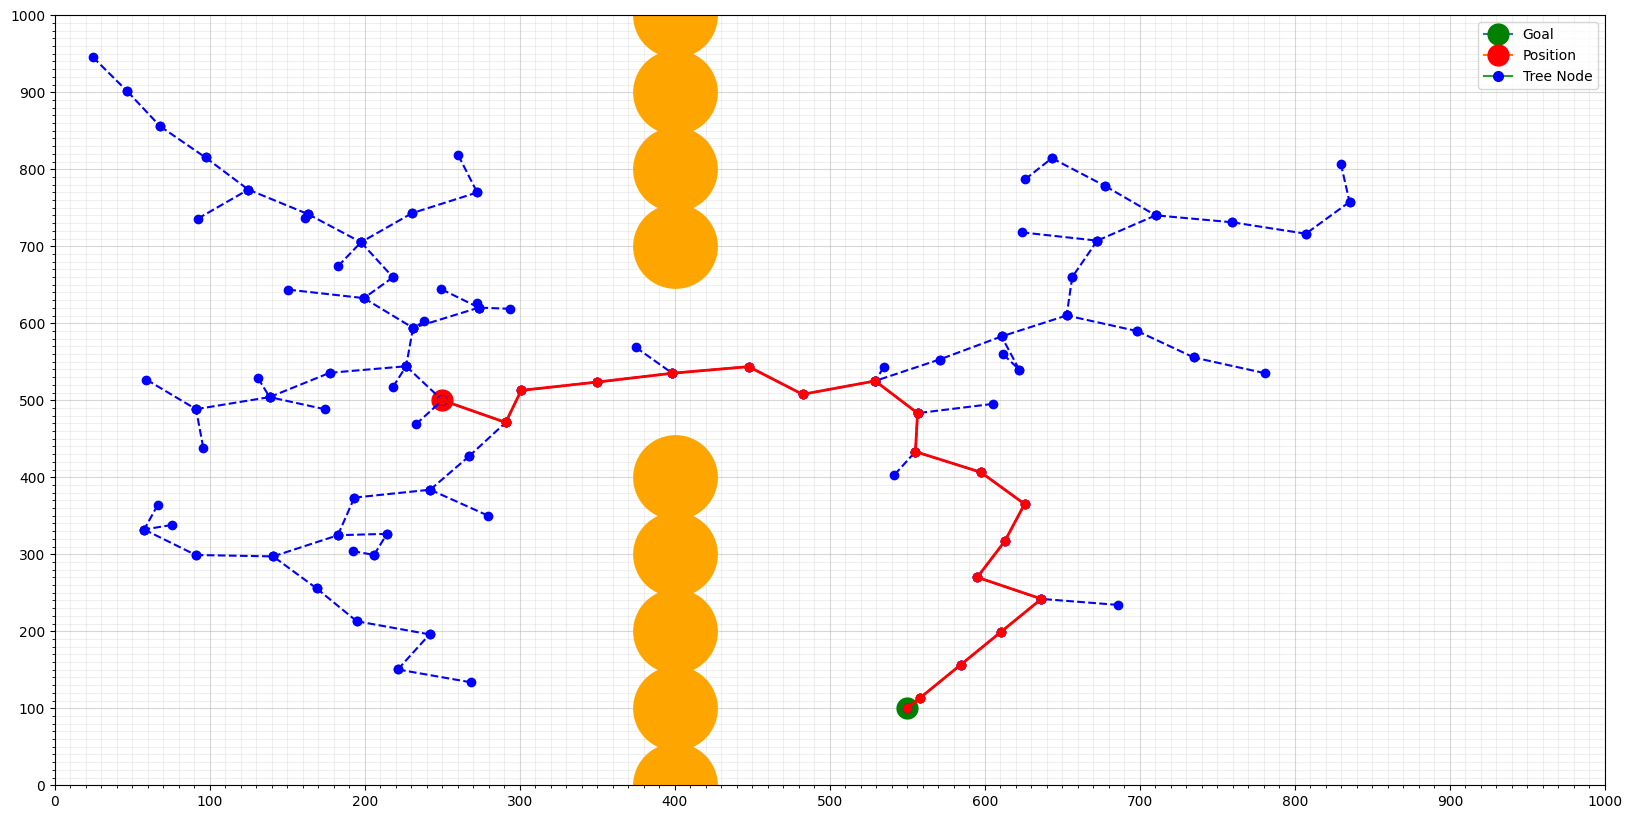

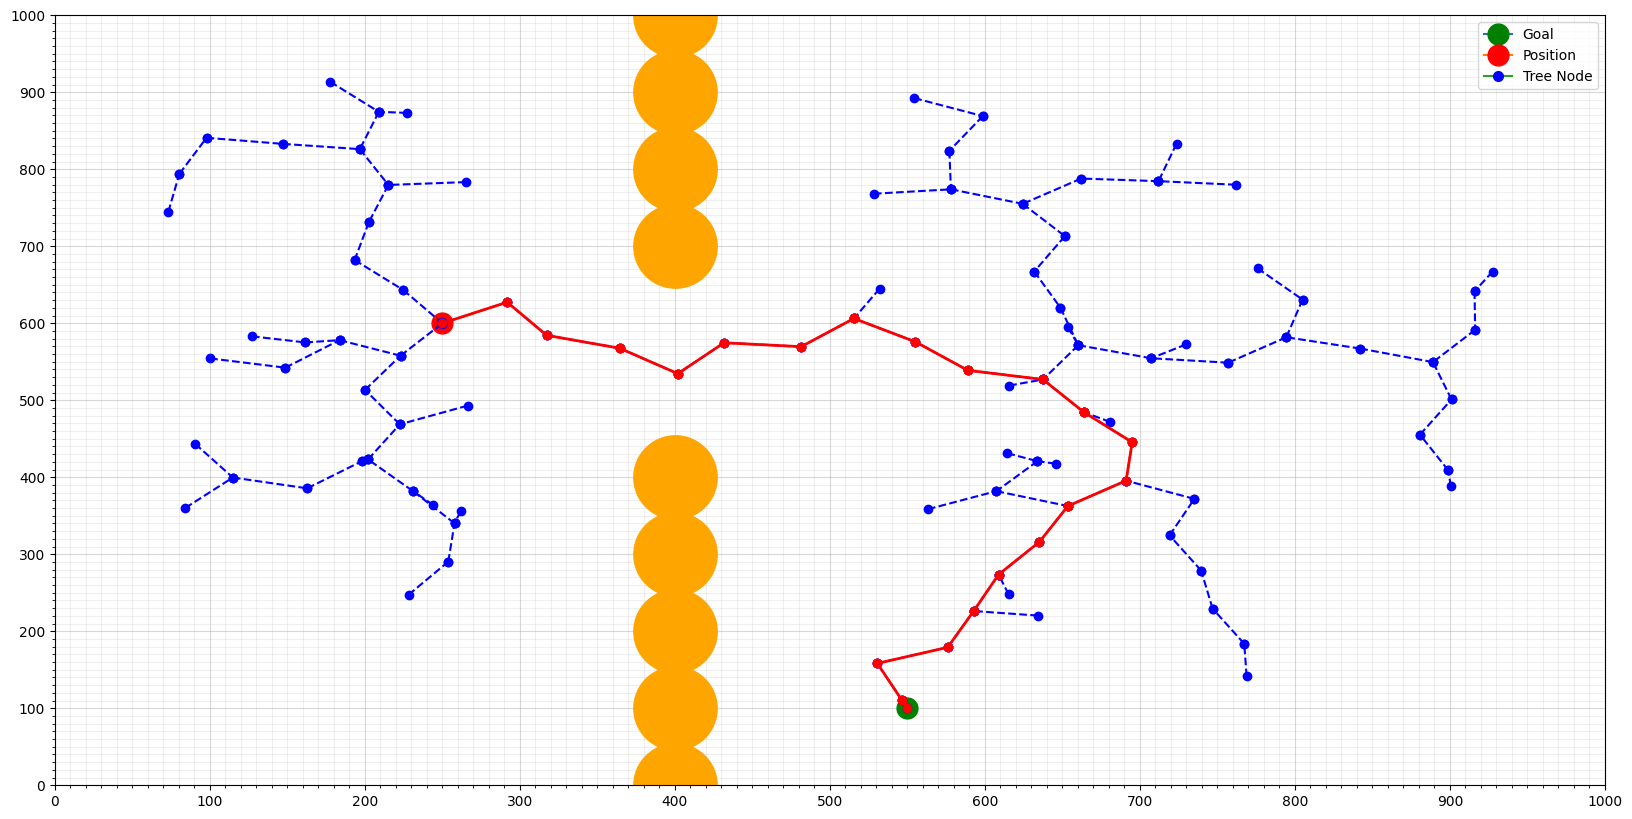

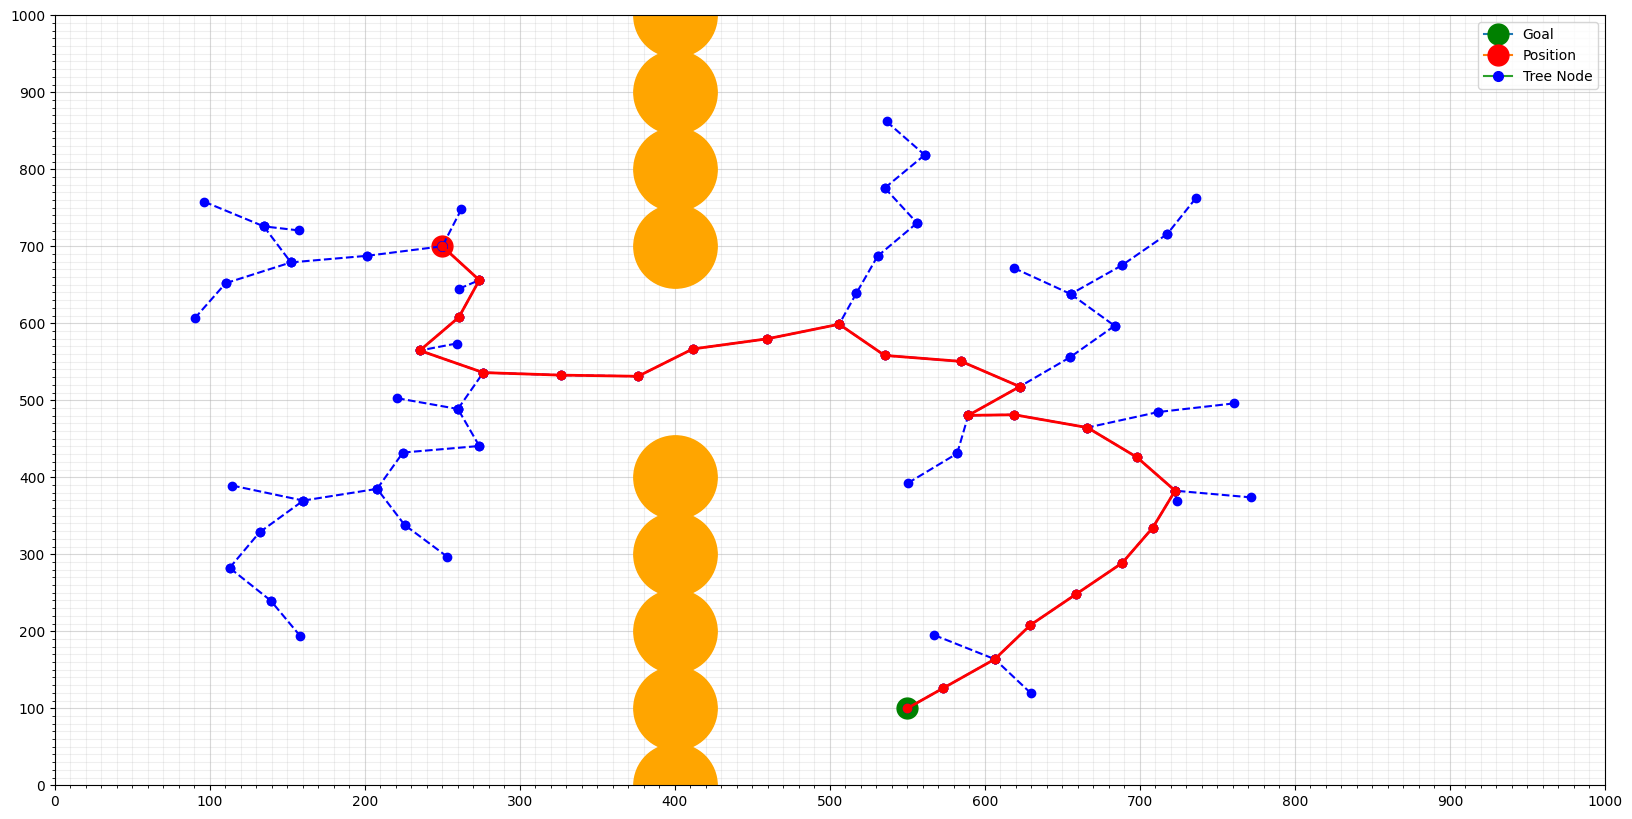

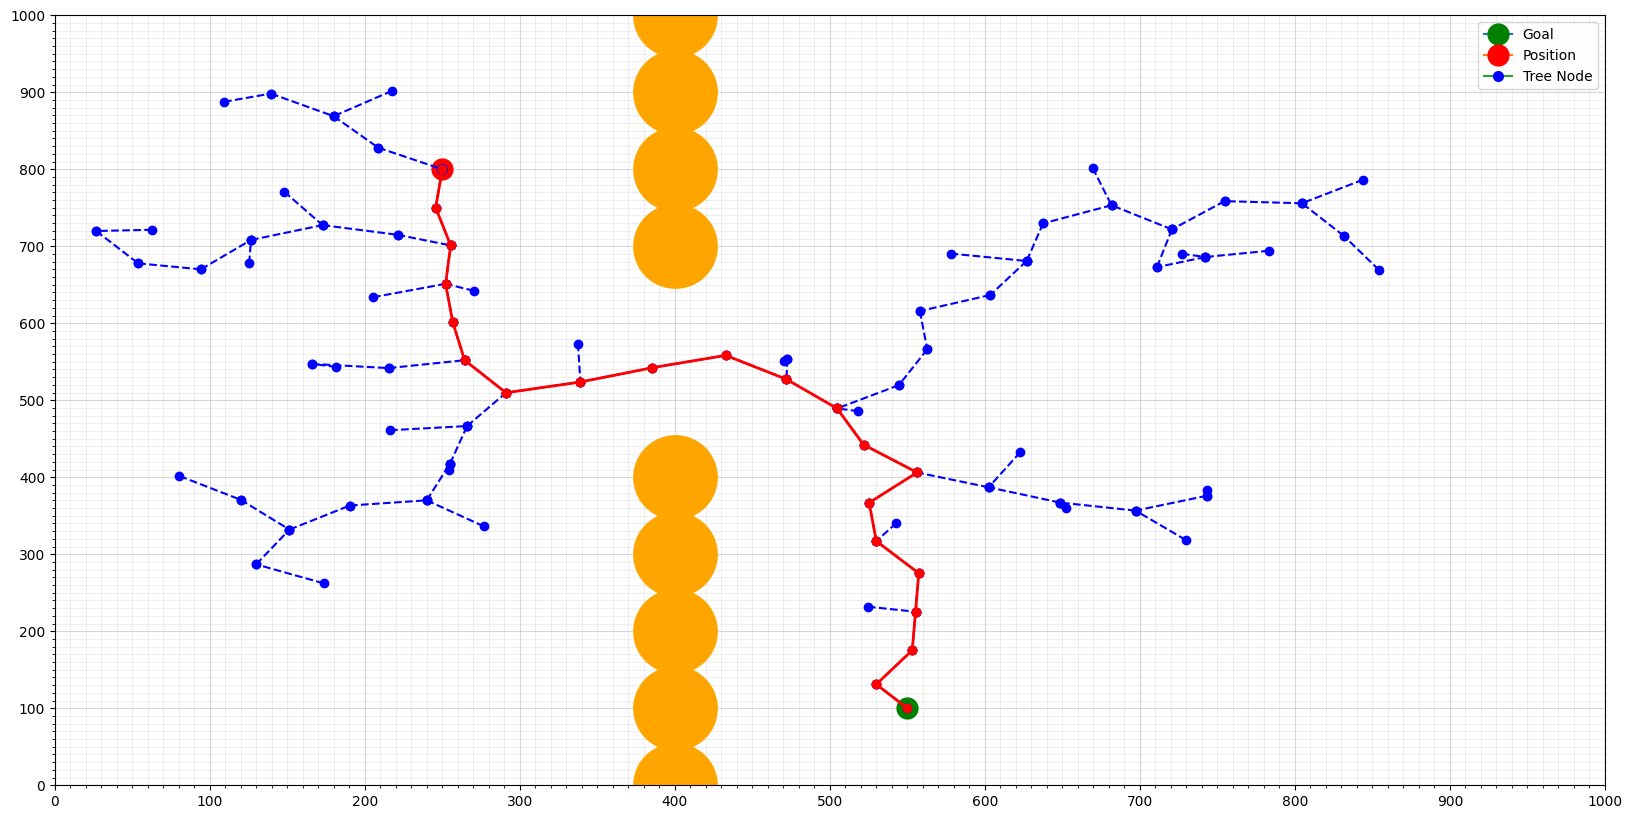

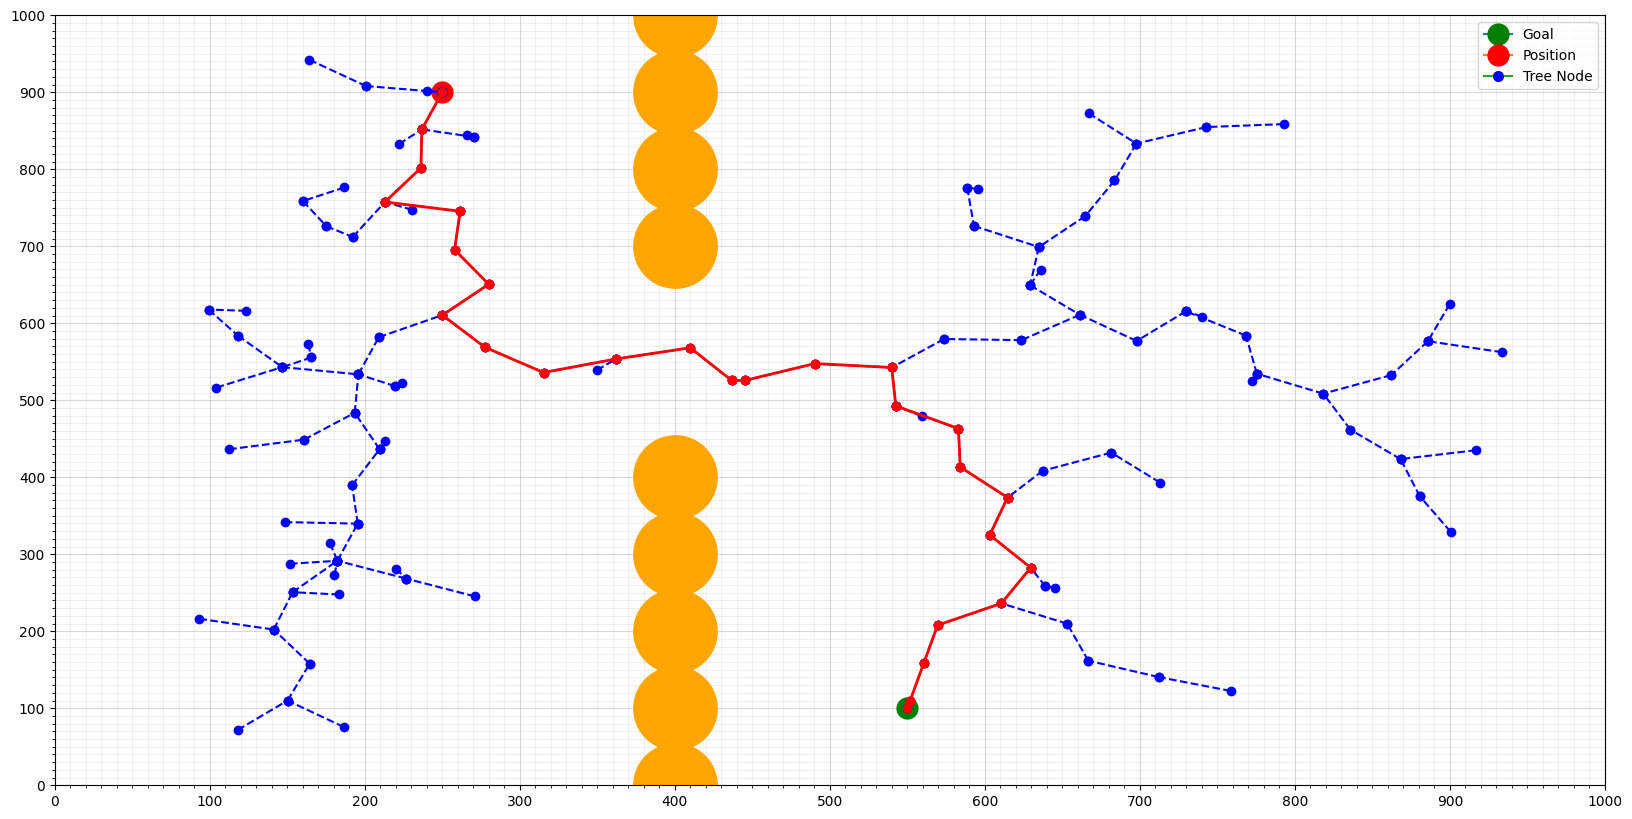

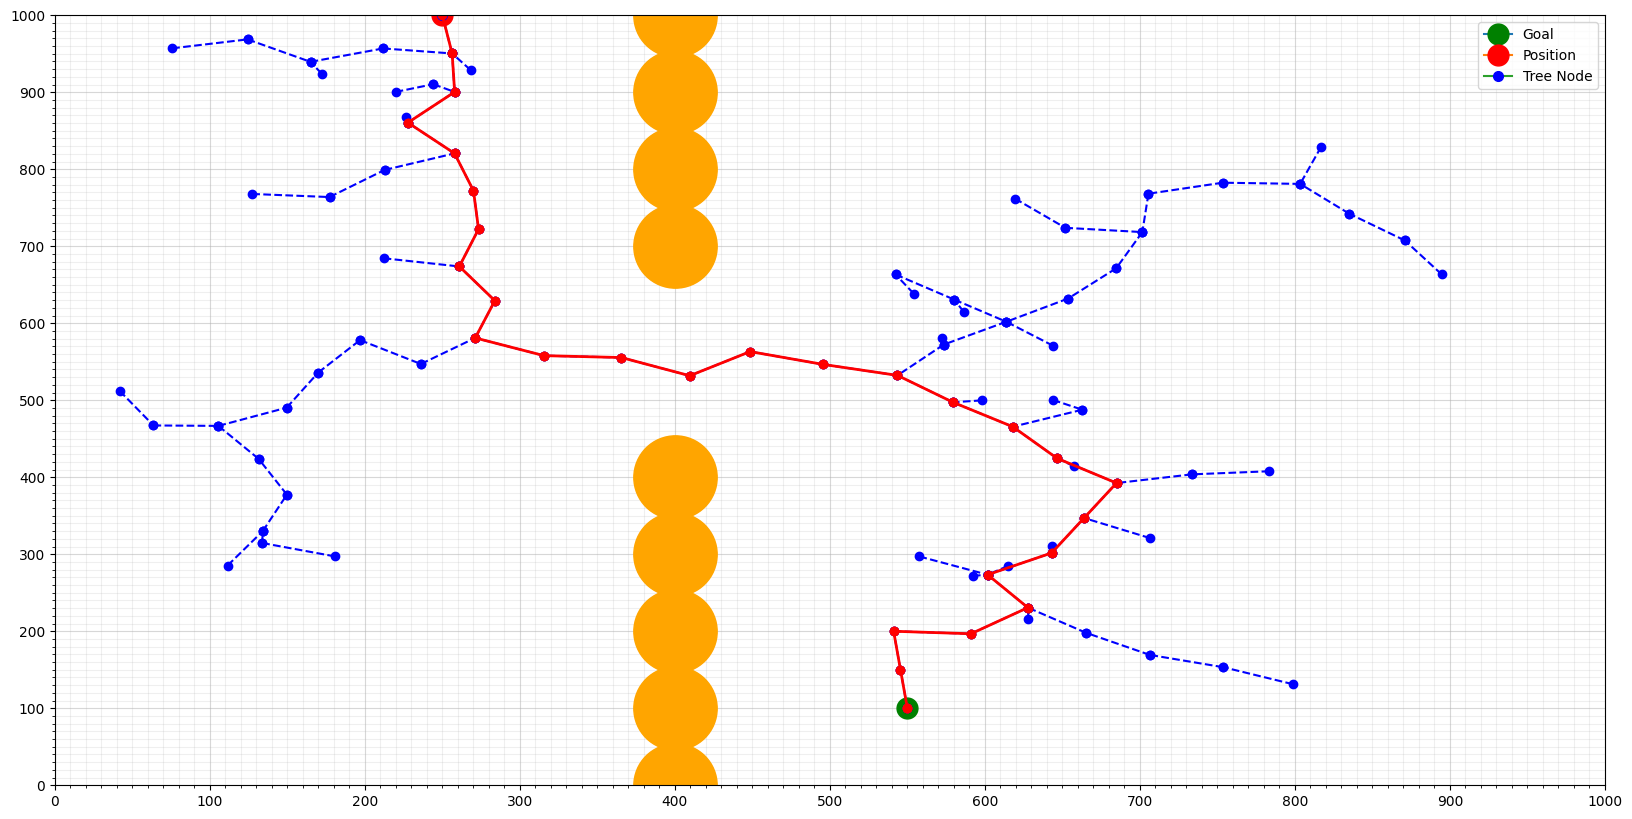

In [115]:
###### Position ######
Position = [[250.0,100.0],[250.0,200.0],[250.0,300.0],[250.0,400.0],[250.0,500.0],[250.0,600.0],[250.0,700.0],[250.0,800.0],
           [250.0,900.0],[250.0,1000.0]]
for i in range(0, len(Position)):
    main(Position[i])